In [1]:
import cv2
from scipy.signal import find_peaks
import numpy as np

import matplotlib.pyplot as plt

### 1. Counting lines and words in a Document image using Connected Component Labelling

In [2]:
img = cv2.imread('./images2/img_txt1.png',0)
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

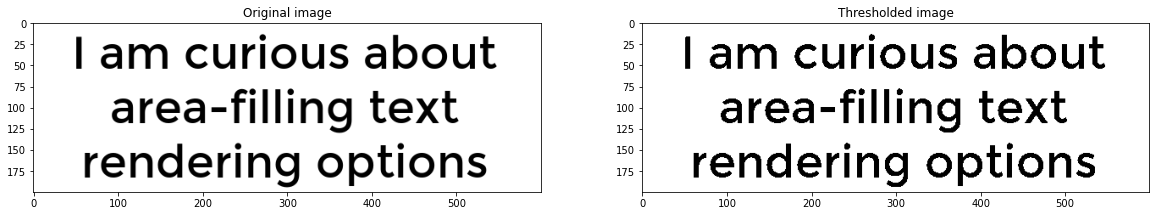

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.subplot(222)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded image')
plt.show()

In [8]:
# Horizontal kernel
h_kernel = np.ones((5,25), np.uint8)

#Perform line erosion
erosion = cv2.erode(thresh, h_kernel, iterations=1)

# Connected Component Labelling
# Foregroung of the image should be white, otherwise need to ~the eroded img
connectivity = 8
total_labels, labels, stats, centroids  = cv2.connectedComponentsWithStats(~erosion, connectivity, cv2.CV_32S)

# Subtract background from total_labels
print(total_labels-1)

3


Text(0.5, 1.0, 'Detected lines')

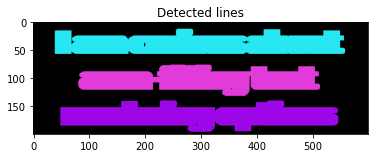

In [9]:
# Visualizing detected lines

colors = np.random.randint(0, 255, size=(total_labels, 3), dtype = np.uint8)

# mark background as 0
colors[0] = [0, 0, 0]

colored_components = colors[labels]

plt.imshow(colored_components, cmap='gray')
plt.title('Detected lines')

8


Text(0.5, 1.0, 'Detected Words')

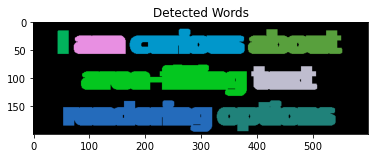

In [11]:
# Counting words
w_kernel = np.ones((5,15), np.uint8)
word_erosion = cv2.erode(thresh, w_kernel, iterations=1)
total_labels, labels, stats, centroids  = cv2.connectedComponentsWithStats(~word_erosion,4, cv2.CV_32S)

print(total_labels-1)

colors = np.random.randint(0, 255, size=(total_labels, 3), dtype = np.uint8)
colors[0] = [0, 0, 0]

colored_components = colors[labels]
plt.imshow(colored_components, cmap='gray')
plt.title('Detected Words')

### 2. Character extraction from image

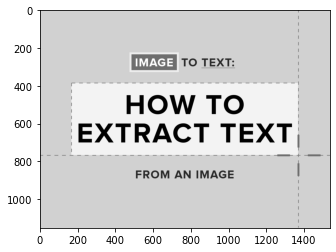

In [13]:
gray = cv2.imread('./images2/img_txt_extract.png',0)
plt.imshow(gray, cmap='gray')

In [14]:
# 1. Primary operations : image decomposition

# Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

# Closing
clos = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations = 10)

# Difference and thresholding
diff = gray-clos
ret, thresh = cv2.threshold(diff,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

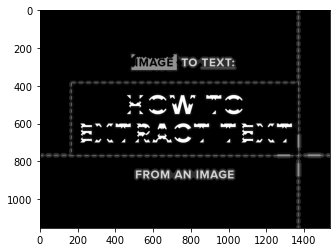

In [15]:
# 2. Feature emphasis

# opening
opening = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 10)
# dilation
dilation = cv2.dilate(opening, kernel, iterations=10)
# opening
opening2 = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel, iterations = 10)

E_i = opening2 * gray
plt.imshow(E_i, cmap='gray')

In [ ]:
# Finding Histogram peaks

In [ ]:
# 3. Extracting character